In [1]:
suppressMessages(library(ggplot2))
suppressMessages(library(ArchR))
suppressMessages(library(Seurat))
suppressMessages(library(Signac))

In [2]:
set.seed(42)
addArchRThreads(threads = 64)

Setting default number of Parallel threads to 64.



In [3]:
proj <- loadArchRProject("./ArchRProject", showLogo = FALSE)

Successfully loaded ArchRProject!



### 计算每个簇的质控指标
 - Tss Enrichment
 - logFrag
 - 删掉存在质量问题的簇
 

Length of unique values greater than palette, interpolating..

1 


Length of unique values greater than palette, interpolating..

1 




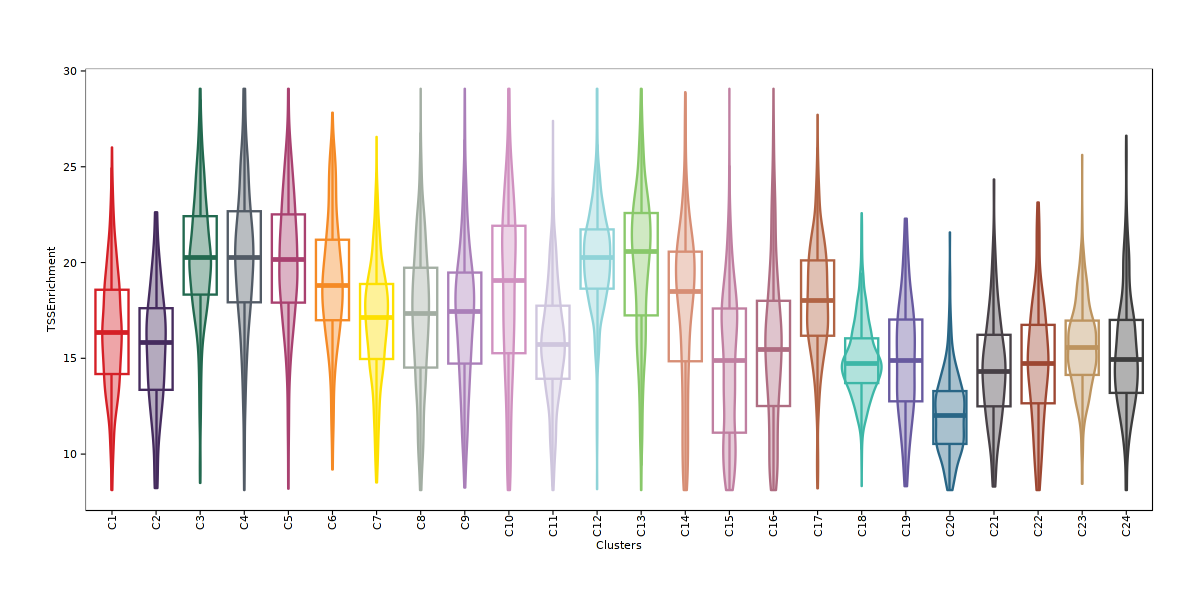

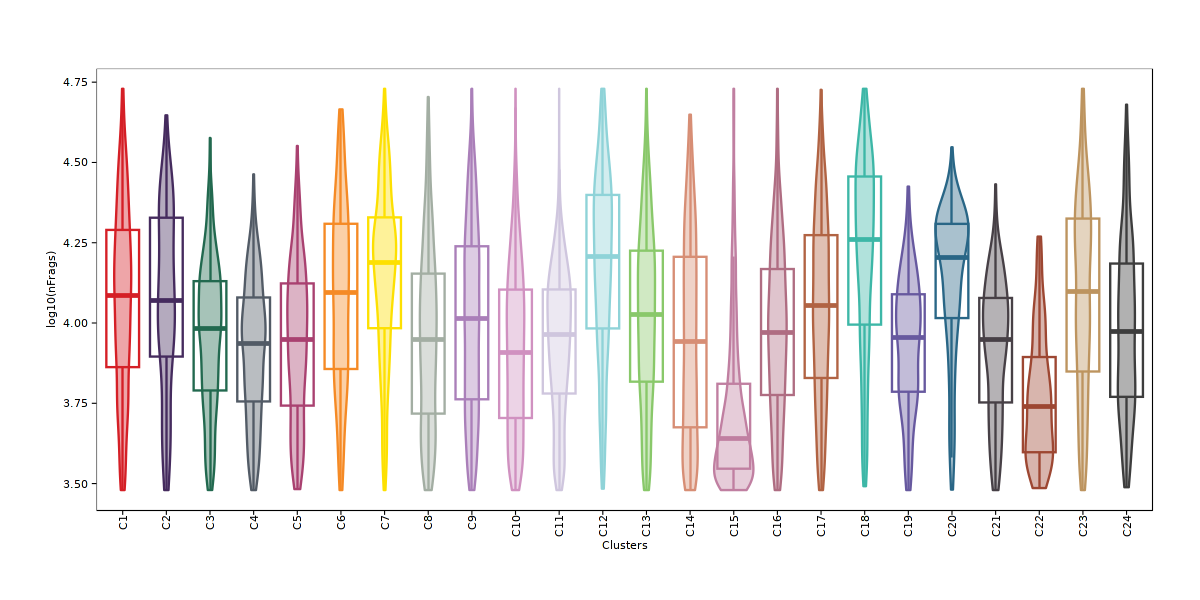

In [4]:
## Visualize data quality
## 统计TSSEnrichment和log10(nFrags)的分布
p1 <- plotGroups(ArchRProj = proj, 
                 groupBy = "Clusters", 
                 colorBy = "cellColData", 
                 name = "TSSEnrichment",
                 alpha = 0.4,
                 plotAs = "violin",
                 addBoxPlot = TRUE)

p2 <- plotGroups(ArchRProj = proj, 
                 groupBy = "Clusters", 
                 colorBy = "cellColData", 
                 name = "log10(nFrags)",
                 plotAs = "violin",
                 alpha = 0.4,
                 addBoxPlot = TRUE)

options(repr.plot.width = 10, repr.plot.height = 5)

p1
p2

In [5]:
# 删掉低质量簇
## 标记问题簇
problematic_clusters <- c("C15")
keep_cells <- rownames(proj@cellColData)[!proj@cellColData$Clusters %in% problematic_clusters]

proj_clean <- subsetArchRProject(
    ArchRProj = proj,
    cells = keep_cells,
    outputDirectory = "./ArchRProject_clean"
    )

Dropping ImputeWeights Since You Are Subsetting Cells! ImputeWeights is a cell-x-cell Matrix!

Copying ArchRProject to new outputDirectory : /home/xwt/BCY_ATAC/after_neoadjuvant/ArchRProject_clean

Copying Arrow Files...

Getting ImputeWeights

No imputeWeights found, returning NULL

Copying Other Files...

Copying Other Files (1 of 9): Annotations

Copying Other Files (2 of 9): Background-Peaks.rds

Copying Other Files (3 of 9): Embeddings

Copying Other Files (4 of 9): GeneScoreMatrix.Rds

Copying Other Files (5 of 9): GroupCoverages

Copying Other Files (6 of 9): IterativeLSI

Copying Other Files (7 of 9): PeakCalls

Copying Other Files (8 of 9): PeakMatrix.Rds

Copying Other Files (9 of 9): Plots

Saving ArchRProject...

Loading ArchRProject...

Successfully loaded ArchRProject!


                                                   / |
                                                 /    \
            .                                  /      |.
            \\\                     

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-1043173167194f-Date-2024-07-04_Time-06-50-20.136294.log
If there is an issue, please report to github with logFile!



Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-1043173167194f-Date-2024-07-04_Time-06-50-20.136294.log

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-104317504c6b5f-Date-2024-07-04_Time-06-50-22.891346.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 
Length of unique values greater than palette, interpolating..



ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-104317504c6b5f-Date-2024-07-04_Time-06-50-22.891346.log



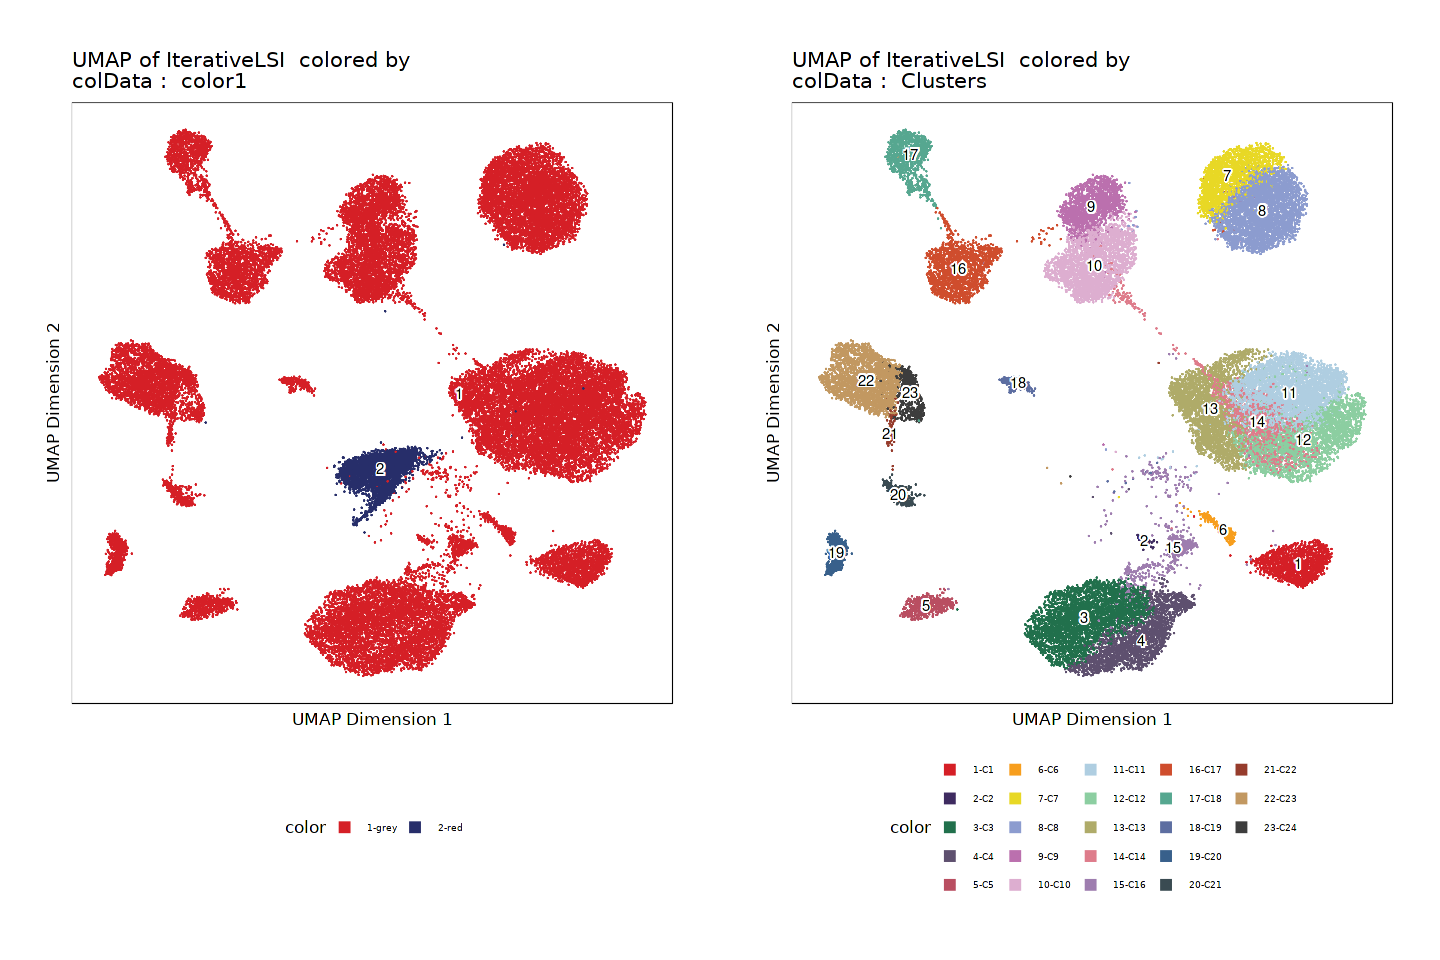

In [6]:
options(repr.plot.height = 8, repr.plot.width = 12)
proj@cellColData$color1 <- ifelse(proj@cellColData$Clusters %in% problematic_clusters, "red", "grey")
p1 <- plotEmbedding(
    ArchRProj = proj, 
    colorBy = "cellColData", 
    name = "color1", 
    embedding = "UMAP"
    )
p2 <- plotEmbedding(
    ArchRProj = proj_clean, 
    colorBy = "cellColData", 
    name = "Clusters", 
    embedding = "UMAP"
    )
ggAlignPlots(p1, p2, type = "h")

In [7]:
# MAGIC
proj_clean <- addImputeWeights(ArchRProj = proj_clean)

ArchR logging to : ArchRLogs/ArchR-addImputeWeights-1043172d9d1d4-Date-2024-07-04_Time-08-17-14.264089.log
If there is an issue, please report to github with logFile!

2024-07-04 08:17:14.334922 : Computing Impute Weights Using Magic (Cell 2018), 0 mins elapsed.



In [8]:
## 保存结果
saveArchRProject(proj_clean, load = FALSE)

Saving ArchRProject...

